# Project 1 By Eli Weiss and Randy Leon

Import the data and Clean out the NAs from the Data

In [193]:
import pandas as pd
import numpy as np

filename = "https://raw.githubusercontent.com/jtopor/DAV-5400/master/Project1/hflights.csv"
Flights = pd.read_csv(filename)

#This Column is full of NAs and will not be helpful in this study
# So we are removing it
Flights = Flights.drop(columns=['CancellationCode'])
#Remove all NAs
Flights = pd.DataFrame.dropna(Flights)

## Question 1: What day of the Week is the best to fly?

Here we are creating 2 calculated fields. 

The First is the total delay calculated by adding the Departure Delay to the Arrival Delay time.
The Second shows the sum of Total Delay time by the Day of the Week.

In [194]:
#Add a Column Called Total Delay to the Data Frame
Flights['TotalDelay'] = np.repeat(0, len(Flights.Month))
Flights.TotalDelay = Flights.DepDelay+Flights.ArrDelay


#Calulate the Total Delay by the Day of the Week (DOW)
Delay_DOW = [sum(Flights.TotalDelay[Flights.DayOfWeek == i]) for i in [1,2,3,4,5,6,7] ]
print(Delay_DOW)

[64965.0, 36208.0, 12489.0, 41333.0, 32585.0, 24371.0, 54050.0]


In [195]:
#convert the list into a pandas object so that it can be used
DOWD = pd.Series(Delay_DOW)

#Get summary Statistics about the distrobution of Delay By Day of the Week
DOWD.describe()

count        7.000000
mean     38000.142857
std      17630.073099
min      12489.000000
25%      28478.000000
50%      36208.000000
75%      47691.500000
max      64965.000000
dtype: float64

Now that we have the total Delay by Day of the Week we are going to plot it so we can visualize the difference.

<BarContainer object of 7 artists>

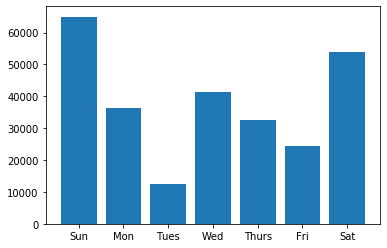

In [196]:
import matplotlib.pyplot as plt

#X Axis Lables 
x_pos = ['Sun','Mon','Tues','Wed','Thurs','Fri','Sat'] 
#Make a Bar Plot
plt.bar(x_pos, DOWD)

We see that the day with the least delays overall is Tuesday. At 12,000 min of delay time this is far beneath the median of 38,000.

## Question 2: Which Airline is the best to take?

In this question we are exploring which airlines have the most delays. 

Here we are taking the sum of of the Total Delay for each carrier and printing the results.

In [197]:
#using a comprehension we are summing the value of the Total Delay per Airline
Delay_Carrier_Sum = [sum(Flights.TotalDelay[Flights.UniqueCarrier == i]) for i in ['AA','AS','B6','CO','DL','OO','UA','US','WN','EV','F9','FL','MQ','XE']]

#Define the index so that we can map the names of the Airlines to the values later
index  = ['AA','AS','B6','CO','DL','OO','UA','US','WN','EV','F9','FL','MQ','XE']

#Print the values
Delay_Carrier = pd.Series(Delay_Carrier_Sum, index)
print(Delay_Carrier)

AA      3317.0
AS       819.0
B6      2737.0
CO    103037.0
DL      2938.0
OO      8600.0
UA       172.0
US      -756.0
WN     84316.0
EV      3359.0
F9      1242.0
FL       740.0
MQ      5540.0
XE     49940.0
dtype: float64


In [198]:
#Summary of descriptive statistics
Delay_Carrier.describe()

count        14.000000
mean      19000.071429
std       34319.986163
min        -756.000000
25%         924.750000
50%        3127.500000
75%        7835.000000
max      103037.000000
dtype: float64

Plot the Total Delay by Each Airline

([<matplotlib.axis.XTick at 0x1a23b8f978>,
 <a list of 14 Text xticklabel objects>)

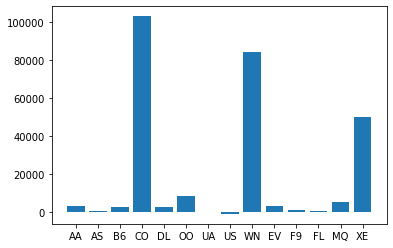

In [199]:
y_pos = np.arange(len(index))

#Make a Bar Plot
plt.bar(y_pos, Delay_Carrier_Sum)

#Put the names of the Airlines on the X Axis
plt.xticks(y_pos, index)

As we can see there is significant variation by the Airline, Travelers should avoid CO,WN, and XE.

In [133]:
##importing all of my data analysis tools!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pandas import Series, DataFrame

In [164]:
##given code block at the beginning of the assignment
filename = "https://raw.githubusercontent.com/jtopor/DAV-5400/master/Project1/hflights.csv"

Flight_Project = pd.read_csv(filename)

In [43]:
##taking a sneak peek at the data 
print(Flight_Project)

       Year  Month  DayofMonth  DayOfWeek  DepTime  ArrTime UniqueCarrier  \
0      2011      1           1          6   1400.0   1500.0            AA   
1      2011      1           2          7   1401.0   1501.0            AA   
2      2011      1           3          1   1352.0   1502.0            AA   
3      2011      1           4          2   1403.0   1513.0            AA   
4      2011      1           5          3   1405.0   1507.0            AA   
5      2011      1           6          4   1359.0   1503.0            AA   
6      2011      1           7          5   1359.0   1509.0            AA   
7      2011      1           8          6   1355.0   1454.0            AA   
8      2011      1           9          7   1443.0   1554.0            AA   
9      2011      1          10          1   1443.0   1553.0            AA   
10     2011      1          11          2   1429.0   1539.0            AA   
11     2011      1          12          3   1419.0   1515.0            AA   

# I'm going to try an answer the question: 

Which airport in Houston yield more efficient results? 

Travelers want to get to their destination as quickly and efficiently as possible, so with measurable data, one can formulate reasonable hypotheses on which airport will have the less likely chance of wasting time.

First, I think it will make sense to define what 'more efficient' means. Generally, a 'better' experience in an airport (with respect to the data we have available) would be a faster, more hassle-free one with as least time wasted as possible. 
Webster's Dictionary online (https://www.merriam-webster.com/dictionary/efficient) defines the word "efficient" as "capable of producing desired results with little or no waste (as of time or materials)"

For this analysis, I first want to assume that there will be no discrimination between the following variables:

A)destinations, 
B)date/time of departures,
C)flight/tail numbers, or 
D)the distance of the flight.
E)price of the flight - since no data is available.
F)preference to the time of day the flights take place - I am assuming every traveler does not care when their plane leaves.

What I will take into consideration for each airport will be:

a)# of aggreggated flights and carriers. - more flights/carriers means a better chance of any given passenger making any given flight

b)ratio of delayed flights to total flights flown, for all flights aggregated - this will give us a percentage of the number of delayed flights to the total number in the airport so as to measure the efficiency of each airport.

c)average taxi-in and taxi-out times - I will again, measure this aggregated and split this up by carrier to point out trends by carrier. The taxi-ing of a plane is a coordinated approach between the airline and the carrier, so separating them helps note any key trends across either party.


-------------------------------------------------------------------------------------------------------------

First thing's first is to count the number of flights for the entire data set for each respective airport.

In [20]:
### with this single line of code, I can see the frequency of flights from IAH. The difference between the frequency
##shown below and 20,000 would be the number of flights for the other airport, HOU.
Flight_Project['Origin'].describe()

count     20000
unique        2
top         IAH
freq      15681
Name: Origin, dtype: object

In [29]:
print(20000-15681) ##number of flights that belong to HOU airport
print(15681/4319)  ##IAH flies over 3 times as many flights as HOU
print(4319/20000)  ##HOU is responsible for roughly 22% of all of the flights in the data
print(15681/20000) ##IAH is responsible for roughly 78% of all of the flights in the data.

4319
3.6307015512850196
0.21595
0.78405


Already, IAH carries out more than 3 times as many flights as HOU. If I was a traveler, I'd probably opt for choosing IAH over HOU. 

In [31]:
##wanting to find out all of the unique carriers for both airports
Flight_Project.UniqueCarrier.unique()

array(['AA', 'AS', 'B6', 'CO', 'DL', 'OO', 'UA', 'US', 'WN', 'EV', 'F9',
       'FL', 'MQ', 'XE'], dtype=object)

In [45]:
##show counts of unique airlines available at each airport, 7 in HOU, 10 in IAH
print (Flight_Project.groupby('Origin')['UniqueCarrier'].nunique())

Origin
HOU     7
IAH    10
Name: UniqueCarrier, dtype: int64


Here, I can see that IAH offers 10 different airlines, while HOU only offers 7.

In [67]:
##making a dataframe that lists only the flights coming out of HOU
Flight_Project_HOU= Flight_Project[Flight_Project.Origin != 'IAH']
print(Flight_Project_HOU)

       Year  Month  DayofMonth  DayOfWeek  DepTime  ArrTime UniqueCarrier  \
304    2011      1           1          6    654.0   1124.0            B6   
305    2011      1           1          6   1639.0   2110.0            B6   
306    2011      1           2          7    703.0   1113.0            B6   
307    2011      1           2          7   1604.0   2040.0            B6   
308    2011      1           3          1    659.0   1100.0            B6   
309    2011      1           3          1   1801.0   2200.0            B6   
310    2011      1           4          2    654.0   1103.0            B6   
311    2011      1           4          2   1608.0   2034.0            B6   
312    2011      1           5          3    700.0   1103.0            B6   
313    2011      1           5          3   1544.0   1954.0            B6   
314    2011      1           6          4   1532.0   1943.0            B6   
315    2011      1           7          5    654.0   1117.0            B6   

In [68]:
##making a dataframe that lists only the flights coming out of IAH
Flight_Project_IAH= Flight_Project[Flight_Project.Origin != 'HOU']
print(Flight_Project_HOU)

       Year  Month  DayofMonth  DayOfWeek  DepTime  ArrTime UniqueCarrier  \
304    2011      1           1          6    654.0   1124.0            B6   
305    2011      1           1          6   1639.0   2110.0            B6   
306    2011      1           2          7    703.0   1113.0            B6   
307    2011      1           2          7   1604.0   2040.0            B6   
308    2011      1           3          1    659.0   1100.0            B6   
309    2011      1           3          1   1801.0   2200.0            B6   
310    2011      1           4          2    654.0   1103.0            B6   
311    2011      1           4          2   1608.0   2034.0            B6   
312    2011      1           5          3    700.0   1103.0            B6   
313    2011      1           5          3   1544.0   1954.0            B6   
314    2011      1           6          4   1532.0   1943.0            B6   
315    2011      1           7          5    654.0   1117.0            B6   

I wanted to split the dataframe by airport so it can be easy to work with and write less complicated code. 

We can also look at the number of flights by airline out of IAH and HOU.

In [106]:
##to find out how many flights per carrier out of HOU
Flight_Project_HOU['UniqueCarrier'].value_counts().to_frame().reset_index().rename(columns={'index':'values', 'values':'count'})

,values,UniqueCarrier
0,WN,3708
1,MQ,207
2,FL,144
3,B6,100
4,DL,87
5,F9,62
6,EV,11


In [107]:
##to find out how many flights per carrier out of IAH
Flight_Project_IAH['UniqueCarrier'].value_counts().to_frame().reset_index().rename(columns={'index':'values', 'values':'count'})

,values,UniqueCarrier
0,CO,6830
1,XE,6775
2,OO,699
3,AA,519
4,US,308
5,DL,171
6,MQ,124
7,UA,101
8,EV,95
9,AS,59


Let's look at the flights delayed in IAH as a ratio.

In [111]:
Flight_Project_IAH.DepDelay.describe()

count    15533.000000
mean         6.886757
std         23.771530
min        -18.000000
25%         -3.000000
50%          0.000000
75%          8.000000
max        780.000000
Name: DepDelay, dtype: float64

In [114]:
print('The percentage of flights delayed out of all flights in IAH is:')
print(15533/15681)

The percentage of flights delayed out of all flights in IAH is:
0.9905618264141317


In [112]:
Flight_Project_HOU.DepDelay.describe()

count    4252.000000
mean       13.452023
std        23.822074
min       -14.000000
25%        -1.000000
50%         5.000000
75%        19.000000
max       247.000000
Name: DepDelay, dtype: float64

In [115]:
print('The percentage of flights delayed out of all flights in HOU is:')
print(4252/4319)

The percentage of flights delayed out of all flights in HOU is:
0.9844871498031952


Here we can see that both airports experience high rates of delays, (both in the upper 90's) IAH only experiences 1% more delays than HOU. For comparison purposes, these airports are essentially the same in their delay rate. HOWEVER, we are able to notice that the average delay for IAH is just over half the length of delays that occur in HOU. An average delay of only about 7 minutes in IAH versus an average delay of about 13 minutes in HOU.

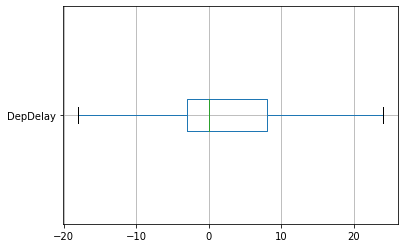

In [149]:
Flight_Project_IAH.boxplot(column="DepDelay", vert=False, showfliers=False)

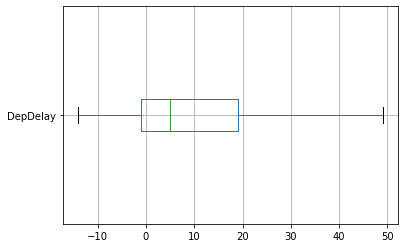

In [147]:
Flight_Project_HOU.boxplot(column="DepDelay", vert=False, showfliers=False)

Here these two box and whisker graphs tell a story about the delay times at each airport. (I took out outliers)

FOR IAH - the box sits between approximately -4 and 8 minutes of a delay (I'm assuming a negative delay means that the flight left earlier than anticipated!) IAH's first 50% of all delay times are either a negative delay or 0, which is very good, the latter 50% show delays with a sans-outlier max of 20 minutes.

FOR HOU - the box sits between about -1 and 19, so it's a wider range for a delay. The first 50% goes from about -15 to 5, (so there's a greater chance your plane will leave early) and the latter 50% show your plane could range from 5 to roughly 50 minutes of a delay (sans-outliers)

In my opinion, I'd rather go with IAH, given that I'd most likely only be delayed by about 20 minutes.
A flight out of HOU would be riskier to take if I want to avoid delay time.

Now I will use a similar tactic to find out some info on the taxi time for flights OUTBOUND - this can be viewed in the same light as a delay. - just because I'm on my plane, doesn't mean I am actively reducing the distance to my destination! 

(I've left out Taxi_In times because I deem them unimportant, as I'm trying to take the perspective of the traveler)

In [150]:
#descriptive stats on TaxiOut in IAH
Flight_Project_IAH.TaxiOut.describe()

count    15528.000000
mean        16.753928
std          6.911678
min          4.000000
25%         12.000000
50%         15.000000
75%         19.000000
max         78.000000
Name: TaxiOut, dtype: float64

In [151]:
#descriptive stats on TaxiOut in HOU
Flight_Project_HOU.TaxiOut.describe()

count    4252.000000
mean        9.219661
std         3.454882
min         4.000000
25%         7.000000
50%         8.000000
75%        10.000000
max        59.000000
Name: TaxiOut, dtype: float64

Let's see if we can make some visualizations with this statistical data.

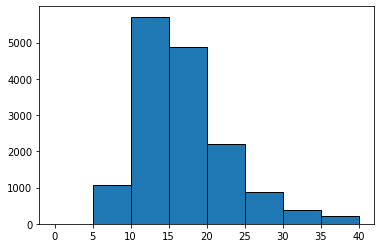

In [161]:
#going to make a bar graph with ranges of TaxiOut times for IAH
bins= [0,5,10,15,20,25,30,35,40]
plt.hist(Flight_Project_IAH.TaxiOut, bins=bins, edgecolor="k")
plt.xticks(bins)

plt.show()

This bar graph mimics a Gaussian distribution with a SLIGHT rightward skewedness for TaxiOut times at IAH.
The majority of the Taxi Out times are between 10 and 25 minutes in length.

***Again, TaxiOut time can be a result of both the carrier and the airport

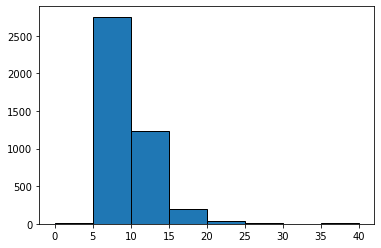

In [160]:
#going to make a bar graph with ranges of TaxiOut times for HOU
bins= [0,5,10,15,20,25,30,35,40]
plt.hist(Flight_Project_HOU.TaxiOut, bins=bins, edgecolor="k")
plt.xticks(bins)

plt.show()

This bar graph also mimics a Gaussian distribution with a stronger rightward skewness for TaxiOut times at IAH then at HOU.
The majority of the Taxi Out times are between 5 and 15 minutes in length.

***Again, TaxiOut time can be a result of both the carrier and the airport

After analysis over all of these indicators, as a person who is risk-averse, I will elect to go with IAH over HOU to have a greater selection of flights, airlines, less chance of a lengthy delay and less chance of lengthy taxi-out time. After all of this analysis, I can imagine that IAH is simply a bigger airport that provides more service than HOU.

# I'm going to try an another question for two reasons!
A) My partner and I agreed on four answered questions for motivation!
B) My partner and I found that doing 4 questions would split the work evenly.

Our last question will be:
***What is the average "non-airtime" for any given flight across all airlines and airports? I want to be able to see the percent of time a flight is in the air and not in the air over its entire elapsed time.

Since I already have my dataframe split into two by airport, it couldn't hurt to find these numbers as a whole and with respect to the airports.

In [173]:
#making the new column in the orignal data frame
Flight_Project['NonAirTime'] = (Flight_Project["ActualElapsedTime"] - Flight_Project["AirTime"])
print(Flight_Project)

       Year  Month  DayofMonth  DayOfWeek  DepTime  ArrTime UniqueCarrier  \
0      2011      1           1          6   1400.0   1500.0            AA   
1      2011      1           2          7   1401.0   1501.0            AA   
2      2011      1           3          1   1352.0   1502.0            AA   
3      2011      1           4          2   1403.0   1513.0            AA   
4      2011      1           5          3   1405.0   1507.0            AA   
5      2011      1           6          4   1359.0   1503.0            AA   
6      2011      1           7          5   1359.0   1509.0            AA   
7      2011      1           8          6   1355.0   1454.0            AA   
8      2011      1           9          7   1443.0   1554.0            AA   
9      2011      1          10          1   1443.0   1553.0            AA   
10     2011      1          11          2   1429.0   1539.0            AA   
11     2011      1          12          3   1419.0   1515.0            AA   

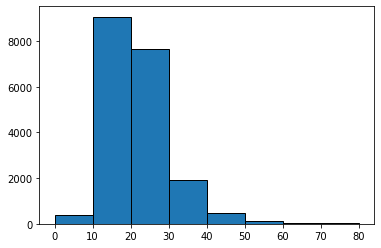

In [189]:
##now for a visualization on "non-air times across all flights for both airports"
bins= [0,10,20,30,40,50,60,70,80]
plt.hist(Flight_Project.NonAirTime , bins=bins, edgecolor="k")
plt.xticks(bins)

plt.show()

Again, we see the classic Gaussian distribution. Most nonair times lie between the 10 and 30 minute mark.

In [176]:
##let's accompany this graph with some descriptive statistics!
Flight_Project.NonAirTime.describe()

count    19738.000000
mean        21.210964
std          8.493510
min          6.000000
25%         15.000000
50%         20.000000
75%         25.000000
max        176.000000
Name: NonAirTime, dtype: float64

Here we can see the data match the picture that the graph shows. 
The empirical rule in statistics says that 

-68% of the data falls between the mean and +/- one standard deviation. (12.7174 and 29.7044)
-95% of the data falls between the mean and +/- two standard deviations. (4.2239 and 38.1979)
-99.7% of the data falls between the mean and +/- three standard deviations. (-4.2695 and 46.6914)

I like that there's a 95% chance that my nonair time would be no more than about 38 minutes. That doesn't sound too bad and could be considered "par for the course" when flying.

https://www.learner.org/courses/againstallodds/pdfs/AgainstAllOdds_StudentGuide_Unit08.pdf

Let's see what we can find when we split the flights by airport!

In [179]:
#making the new column in the IAH dataframe
Flight_Project_IAH['NonAirTime'] = (Flight_Project_IAH["ActualElapsedTime"] - Flight_Project_IAH["AirTime"])
print(Flight_Project_IAH)

       Year  Month  DayofMonth  DayOfWeek  DepTime  ArrTime UniqueCarrier  \
0      2011      1           1          6   1400.0   1500.0            AA   
1      2011      1           2          7   1401.0   1501.0            AA   
2      2011      1           3          1   1352.0   1502.0            AA   
3      2011      1           4          2   1403.0   1513.0            AA   
4      2011      1           5          3   1405.0   1507.0            AA   
5      2011      1           6          4   1359.0   1503.0            AA   
6      2011      1           7          5   1359.0   1509.0            AA   
7      2011      1           8          6   1355.0   1454.0            AA   
8      2011      1           9          7   1443.0   1554.0            AA   
9      2011      1          10          1   1443.0   1553.0            AA   
10     2011      1          11          2   1429.0   1539.0            AA   
11     2011      1          12          3   1419.0   1515.0            AA   

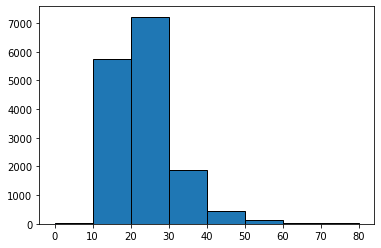

In [188]:
##bar graph for IAH
bins= [0,10,20,30,40,50,60,70,80]
plt.hist(Flight_Project_IAH.NonAirTime , bins=bins, edgecolor="k")
plt.xticks(bins)

plt.show()

In [181]:
##descriptive statistics for IAH
Flight_Project_IAH.NonAirTime.describe()

count    15492.000000
mean        23.081655
std          8.219999
min          8.000000
25%         18.000000
50%         21.000000
75%         27.000000
max        176.000000
Name: NonAirTime, dtype: float64

In [183]:
##making new column in HOU dataframe
Flight_Project_HOU['NonAirTime'] = (Flight_Project_HOU["ActualElapsedTime"] - Flight_Project_HOU["AirTime"])
print(Flight_Project_HOU)

       Year  Month  DayofMonth  DayOfWeek  DepTime  ArrTime UniqueCarrier  \
304    2011      1           1          6    654.0   1124.0            B6   
305    2011      1           1          6   1639.0   2110.0            B6   
306    2011      1           2          7    703.0   1113.0            B6   
307    2011      1           2          7   1604.0   2040.0            B6   
308    2011      1           3          1    659.0   1100.0            B6   
309    2011      1           3          1   1801.0   2200.0            B6   
310    2011      1           4          2    654.0   1103.0            B6   
311    2011      1           4          2   1608.0   2034.0            B6   
312    2011      1           5          3    700.0   1103.0            B6   
313    2011      1           5          3   1544.0   1954.0            B6   
314    2011      1           6          4   1532.0   1943.0            B6   
315    2011      1           7          5    654.0   1117.0            B6   

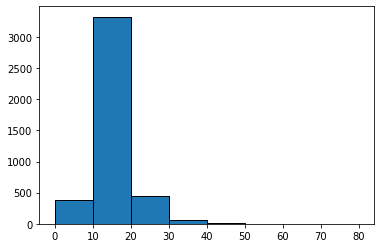

In [187]:
##bar graph for HOU
bins= [0,10,20,30,40,50,60,70,80]
plt.hist(Flight_Project_HOU.NonAirTime , bins=bins, edgecolor="k")
plt.xticks(bins)

plt.show()

In [190]:
Flight_Project_HOU.NonAirTime.describe()

count    4246.000000
mean       14.385539
std         5.428622
min         6.000000
25%        11.000000
50%        13.000000
75%        16.000000
max        74.000000
Name: NonAirTime, dtype: float64

Interesting data we have found!

Some observations to make:

-HOU's NonAirTime mean was about only 62% that of IAH's. (5.42 min vs. 8.21 min)

-HOU's data was packed closer together than that of IAH's! HOU's Range (max-min) was 68 minutes while IAH's was 168 minutes. That is a big difference in the "spread of the data"

To refer to the empirical rule again

-68% of the data for IAH falls between the mean and +/- one standard deviation. (14.8616 min. and 31.3016 min.)
-95% of the data for IAH falls between the mean and +/- two standard deviations. (6.6416 min and 39.5216 min.)
-99.7% of the data for IAH falls between the mean and +/- three standard deviations. (-1.5783 min. and 47.7416 min.)


-68% of the data for HOU falls between the mean and +/- one standard deviation. (8.9569 min and 19.8141 min)
-95% of the data for HOU falls between the mean and +/- two standard deviations. (3.5282 min. and 25.2427 min )
-99.7% of the data for HOU falls between the mean and +/- three standard deviations. (-1.9003 min. and 30.6714 min.)

95% chance of having a NonAirTime of sub 25 min versus a 95% chance of having a sub 40 min NonAirTime

According to these findings, it seems clear that HOU is the better airport if you want less time on the ground and more time in the air!